In [1]:
import csky as cy

In [2]:
import pandas as pd
import histlite as hl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
cy.plotting.mrichman_mpl()
import matplotlib as mpl
plt.rc('font', size=15)


/mnt/ceph1-npx/user/ssclafani/software/external/csky/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


In [4]:
mc = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/MC_NuGen_bfrv1_2153x.hdf')
snowstorm = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/systematics/SnowStorm_Spice321/MC_NuGen_snowstorm_214xx.hdf')

In [5]:
mu_muongun = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/MC_MuonGun_2131x.hdf')
mu_corsika = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/MC_CORSIKA_20904.hdf')

In [6]:
exps = pd.DataFrame()
years = np.arange(2011,2021,1)
for year in years:
    exp = pd.read_hdf('/data/ana/PointSource/DNNCascade/analysis/version-001-p01/IC86_{}_exp.hdf'.format(year))
    exps = pd.concat([exps, exp])

In [7]:
exp = exps

In [8]:
embargo_label = False
if embargo_label:
    plot_dir = cy.utils.ensure_dir('/home/ssclafani/plots/paperplots_embargo/fig_data_mc/')
else:
    plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/Publications/GP/paperplots/fig_data_mc/')

In [9]:
for k in mc.keys():
    if 'one' in k:
        print(k)

BDT_astroness_bdt_mu0100_cscd0000_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_01_runtime_preprocess
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_runtime_preprocess
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_runtime_preprocess
BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_pred_000
BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_runtime_prediction
BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_runtime_preprocess


In [10]:
for k in mc.keys():
    if 'weight' in k:
        if 'meta' not in k:
            print('{}: {}'.format(k , sum(mc[k])))

weights_MCEq_H3a_sibyll2_3c_conv: 0.00016473783595377154
weights_MCEq_H3a_sibyll2_3c_pr: 3.6068609769242074e-06
weights_MCEq_H3a_sibyll2_3c_total: 0.00016834190607301568
weights_aachen_flux: 2.9766572789297216e-06
weights_aachen_flux_8yr: 3.676501768443181e-06
weights_cscd_hans: 1.3153581988045919e-05
weights_cscd_icrc15: 2.7412127787598263e-05
weights_global_fit: 1.63063822011795e-05
weights_hese4_bestfit: 2.0071843800098764e-05
weights_hese4_fixed: 2.3877941076452063e-06
weights_hese6: 6.647010055565925e-05
weights_hese_flux: 2.700481431265561e-06
weights_mese_flux: 1.3532760849076254e-05
weights: 50665.62611714384
weights_livetime: 121276180437201.81


In [11]:
for k in mc.keys():
    if 'veto' in k:
        print(k)

nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv
nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_pr
nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total


In [12]:
lt = mc.weights_livetime[0]

In [13]:
colors = ['#FF7F0E', '#0B3D53', '#5C9FC9', ]

In [14]:
#psuedofit for no snowstorm

mu_norm_corsika = 0.407
mu_norm_muongun = 0.137
conv_norm = 1.1665
astro_norm = 1.65e-18
nu_gamma = 2.58


In [15]:
sorted(mc.keys())

['BDT_astroness_bdt_mu0100_cscd0000_01_pred_000',
 'BDT_astroness_bdt_mu0100_cscd0000_01_runtime_prediction',
 'BDT_astroness_bdt_mu0100_cscd0000_01_runtime_preprocess',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_pred_000',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_runtime_prediction',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_01_runtime_preprocess',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_pred_000',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_runtime_prediction',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_energy_zenith_01_runtime_preprocess',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_pred_000',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_runtime_prediction',
 'BDT_astroness_bdt_mu0100_cscd0000_wo_zenith_01_runtime_preprocess',
 'BDT_bdt_max_depth_4_n_est_1000lr_0.01_seed_3_train_size_50_pred_000',
 'BDT_bdt_max_depth_4_n_est_1000lr_0.01_seed_3_train_size_50_pred_001',
 'BDT_bdt_max_depth_4_n_est_1000lr_0.01_seed_3_train_size_50_runt

In [16]:
print(sum(mc.weights_MCEq_H3a_sibyll2_3c_total)*lt)
print(sum(mc.weights_cscd_hans)*lt)
print(sum( astro_norm * mc.ow* (mc.trueE/1e5)**-nu_gamma)*lt)

51183.86899052471
3999.308508127831
4577.0894815857


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


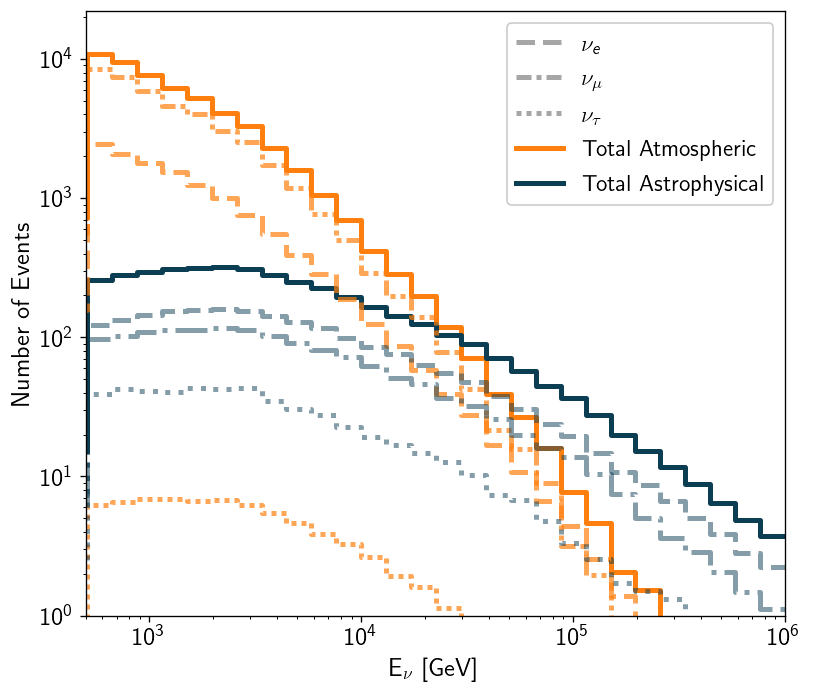

In [17]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7,6))
fig.set_facecolor('w')

nue_mask = np.abs(mc.MCPrimary_pdg_encoding) == 12
numu_mask = np.abs(mc.MCPrimary_pdg_encoding) == 14
nutau_mask = np.abs(mc.MCPrimary_pdg_encoding) == 16

bins = np.logspace(2,6,35)
atmo_nue = hl.hist(mc[nue_mask].energy, 
                     weights = conv_norm* mc[nue_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nue_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nue = hl.hist(mc[nue_mask].energy, 
                     weights = lt*mc[nue_mask].weights_cscd_hans, log=True, bins=bins)

atmo_numu = hl.hist(mc[numu_mask].energy, 
                     weights = conv_norm* mc[numu_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[numu_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_numu = hl.hist(mc[numu_mask].energy, 
                     weights = lt*mc[numu_mask].weights_cscd_hans, log=True, bins=bins)

atmo_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = conv_norm* mc[nutau_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nutau_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = lt*mc[nutau_mask].weights_cscd_hans, log=True, bins=bins)

hl.plot1d(ax, atmo_nue + atmo_numu +atmo_nutau, label=r'Total Atmospheric', color=colors[0], lw=3, ls='-', alpha=1, )
       
hl.plot1d(ax, astro_nue+astro_numu + astro_nutau, label=r'Total Astrophysical', color=colors[1], lw=3, ls='-', alpha=1 )

hl.plot1d(ax, atmo_nue,  color=colors[0], lw=3, ls='--', alpha=0.7, )
hl.plot1d(ax, atmo_numu,  color=colors[0], lw=3, ls=(0, (3, 1, 1, 1, 1, 1)), alpha=0.7)
hl.plot1d(ax, atmo_nutau, color=colors[0], lw=3 ,ls = (0, (1, 1)), alpha=0.7)
#plt.plot(np.nan, np.nan, label=r'MC $\nu$', color=colors[0], lw=4, ls='-', alpha=1 )



plt.plot(np.nan, np.nan, label=r'$\nu_e$', color='grey', lw=3, ls='--', alpha=0.7, )
plt.plot(np.nan, np.nan, label=r'$\nu_\mu$', color='grey', lw=3,  ls=(0, (3, 1, 1, 1)), alpha=0.7, )
plt.plot(np.nan, np.nan, label=r'$\nu_\tau$', color='grey', lw=3,ls = (0, (1, 1)),  alpha=0.7, )

hl.plot1d(ax, astro_nue,  color=colors[1], lw=3, ls='--', alpha=0.5)
hl.plot1d(ax, astro_numu,  color=colors[1], lw=3, ls=':', alpha=0.5)
hl.plot1d(ax, astro_nutau,  color=colors[1], lw=3, ls='-.', alpha=0.5)


if embargo_label:
    plt.text(600, 1.2, r'Under Embargo, Not For Proceedings', weight='bold', c='r')



plt.rc('font', size=14)
ax.loglog()
plt.legend(ncol=1)
ax.set_xlim(500,1e6)
ax.set_ylim(1,22000)
ax.set_xlabel(r'E$_\nu$ [GeV]')
ax.set_ylabel('Number of Events')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'Expected_Events_atmvastro')

In [18]:
plasma = plt.get_cmap('plasma')
plasma(5)
viridis = plt.get_cmap('viridis')
cmap = plt.get_cmap('RdBu')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


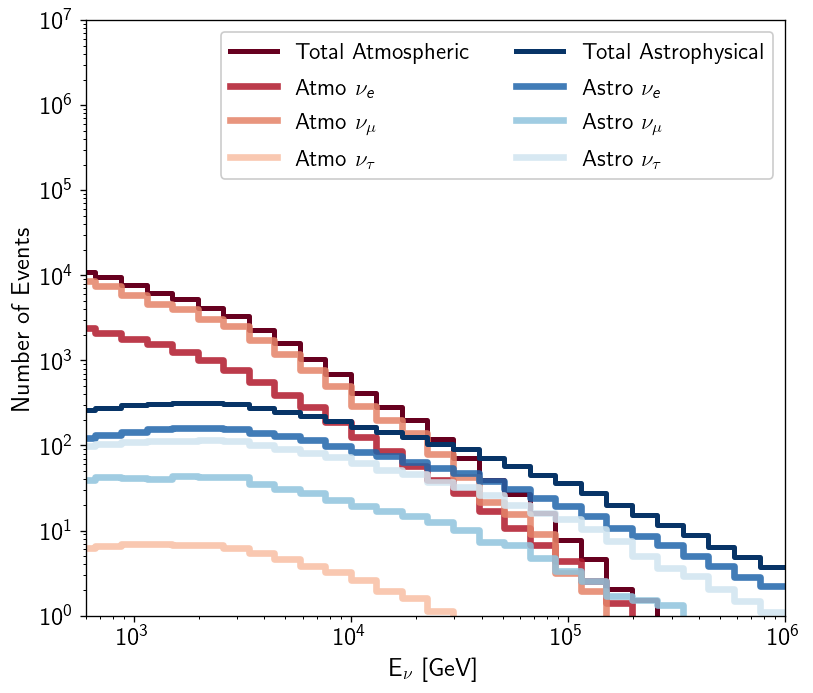

In [19]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7,6))
fig.set_facecolor('w')

nue_mask = np.abs(mc.MCPrimary_pdg_encoding) == 12
numu_mask = np.abs(mc.MCPrimary_pdg_encoding) == 14
nutau_mask = np.abs(mc.MCPrimary_pdg_encoding) == 16

bins = np.logspace(2,6,35)
atmo_nue = hl.hist(mc[nue_mask].energy, 
                     weights = conv_norm* mc[nue_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nue_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nue = hl.hist(mc[nue_mask].energy, 
                     weights = lt*mc[nue_mask].weights_cscd_hans, log=True, bins=bins)

atmo_numu = hl.hist(mc[numu_mask].energy, 
                     weights = conv_norm* mc[numu_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[numu_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_numu = hl.hist(mc[numu_mask].energy, 
                     weights = lt*mc[numu_mask].weights_cscd_hans, log=True, bins=bins)

atmo_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = conv_norm* mc[nutau_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nutau_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = lt*mc[nutau_mask].weights_cscd_hans, log=True, bins=bins)

hl.plot1d(ax, atmo_nue + atmo_numu +atmo_nutau, label=r'Total Atmospheric', color=cmap(0), lw=3, ls = '-', alpha=1, )
       
hl.plot1d(ax, atmo_nue,  color=cmap(.1), label = r'Atmo $\nu_e$',lw=4, ls = '-', alpha=0.85)
hl.plot1d(ax, atmo_numu,  color=cmap(.25),label = r'Atmo $\nu_\mu$',  lw=4, ls ='-', alpha=0.85)
hl.plot1d(ax, atmo_nutau, color=cmap(.35), label= r'Atmo $\nu_\tau$', lw=4 ,ls = '-', alpha=0.85)
#plt.plot(np.nan, np.nan, label=r'MC $\nu$', color=colors[0], lw=4, ls='-', alpha=1 )

hl.plot1d(ax, astro_nue+astro_numu + astro_nutau, label=r'Total Astrophysical', color=cmap(.99), lw=3, ls = '-', alpha=1 ,zorder=10)


#plt.plot(np.nan, np.nan, label=r'$\nu_e$', color='grey', lw=3, ls='--', alpha=0.7, )
#plt.plot(np.nan, np.nan, label=r'$\nu_\mu$', color='grey', lw=3,  ls='--' alpha=0.7, )
#plt.plot(np.nan, np.nan, label=r'$\nu_\tau$', color='grey', lw=3,ls ='--',  alpha=0.7, )

hl.plot1d(ax, astro_nue, label = r'Astro $\nu_e$', color=cmap(.9), lw=4, ls = '-',  alpha=0.85,zorder=10)
hl.plot1d(ax, astro_numu,   label = r'Astro $\nu_\mu$', color=cmap(.7), lw=4 ,ls = '-',  alpha=0.85,zorder=10)
hl.plot1d(ax, astro_nutau,   label = r'Astro $\nu_\tau$', color=cmap(.6), lw=4, ls = '-',  alpha=0.85,zorder=10)




plt.rc('font', size=14)
ax.loglog()
plt.legend(ncol=2)
ax.set_xlim(600,1e6)
ax.set_ylim(1,1e7)
ax.set_xlabel(r'E$_\nu$ [GeV]')
ax.set_ylabel('Number of Events')
plt.tight_layout()
#cy.plotting.saving(plot_dir, 'Expected_Events_atmvastro')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


['Atmo $\\nu_e$', 'Atmo $\\nu_\\mu$', 'Atmo $\\nu_\\tau$', 'Astro $\\nu_e$', 'Astro $\\nu_\\mu$', 'Astro $\\nu_\\tau$', 'Total Atmospheric', 'Total Astrophysical']
-> /home/ssclafani/public_html/Publications/GP/paperplots/fig_data_mc//Expected_Events_atmvastro


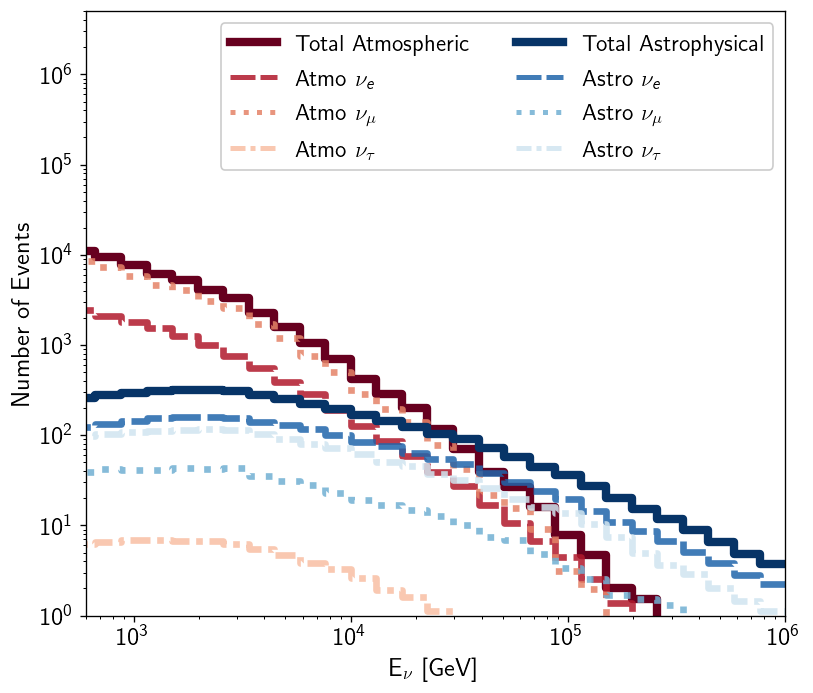

In [20]:
plt.rc('font', size=15)
fig, ax = plt.subplots(figsize=(7,6))
fig.set_facecolor('w')

nue_mask = np.abs(mc.MCPrimary_pdg_encoding) == 12
numu_mask = np.abs(mc.MCPrimary_pdg_encoding) == 14
nutau_mask = np.abs(mc.MCPrimary_pdg_encoding) == 16

bins = np.logspace(2,6,35)
atmo_nue = hl.hist(mc[nue_mask].energy, 
                     weights = conv_norm* mc[nue_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nue_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nue = hl.hist(mc[nue_mask].energy, 
                     weights = lt*mc[nue_mask].weights_cscd_hans, log=True, bins=bins)

atmo_numu = hl.hist(mc[numu_mask].energy, 
                     weights = conv_norm* mc[numu_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[numu_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_numu = hl.hist(mc[numu_mask].energy, 
                     weights = lt*mc[numu_mask].weights_cscd_hans, log=True, bins=bins)

atmo_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = conv_norm* mc[nutau_mask].weights_MCEq_H3a_sibyll2_3c_total*mc[nutau_mask].nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_total * lt, 
                     log=True, bins=bins)

astro_nutau = hl.hist(mc[nutau_mask].energy, 
                     weights = lt*mc[nutau_mask].weights_cscd_hans, log=True, bins=bins)
atmo_tot = atmo_nue + atmo_numu +atmo_nutau
astro_tot = astro_nue+astro_numu+astro_nutau

hl.plot1d(ax, atmo_nue + atmo_numu +atmo_nutau, label=r'Total Atmospheric', color=cmap(0), lw=5, ls = '-', alpha=1, zorder=15)
       
hl.plot1d(ax, atmo_nue,  color=cmap(.1),lw=4, ls = (0, (5, 1)), alpha=0.85)
hl.plot1d(ax, atmo_numu,  color=cmap(.25),lw=4, ls =':', alpha=0.85)
hl.plot1d(ax, atmo_nutau, color=cmap(.35), lw=4,ls=(0, (3, 1, 1, 1)), alpha=0.85)
#plt.plot(np.nan, np.nan, label=r'MC $\nu$', color=colors[0], lw=4, ls='-', alpha=1 )


plt.plot(np.nan, np.nan,color=cmap(.1), label = r'Atmo $\nu_e$',lw=3, ls = (0, (5, 1)), alpha=0.85)
plt.plot(np.nan, np.nan, color=cmap(.25),label = r'Atmo $\nu_\mu$',  lw=3, ls =':', alpha=0.85)
plt.plot(np.nan, np.nan, color=cmap(.35), label= r'Atmo $\nu_\tau$', lw=3,ls=(0, (3, 1, 1, 1)), alpha=0.85)

hist_tot_astro = hl.plot1d(ax, astro_nue+astro_numu + astro_nutau, label=r'Total Astrophysical', color=cmap(.99), lw=5, ls = '-', alpha=1 ,zorder=15)


plt.plot(np.nan, np.nan, label = r'Astro $\nu_e$', color=cmap(.9), lw=3, ls = (0, (5, 1)) , alpha=0.85,)
plt.plot(np.nan, np.nan, label = r'Astro $\nu_\mu$', color=cmap(.74), lw=3 ,ls = ':',  alpha=0.85,)
plt.plot(np.nan, np.nan,  label = r'Astro $\nu_\tau$', color=cmap(.6),lw=3,  ls=(0, (3, 1, 1, 1)),  alpha=0.85, )

hl.plot1d(ax, astro_nue,color=cmap(.9), lw=4, ls = (0, (5, 1)) , alpha=0.85,zorder=10)
hl.plot1d(ax, astro_numu,  color=cmap(.74), lw=4 ,ls = ':',  alpha=0.85,zorder=10)
hl.plot1d(ax, astro_nutau,    color=cmap(.6),lw=4,  ls=(0, (3, 1, 1, 1)),  alpha=0.85,zorder=10)
handles, labels = plt.gca().get_legend_handles_labels()
print(labels)
order = [6,0,1,2,7,3,4,5]
plt.rc('font', size=14)
ax.loglog()
#ax.legend(ncol=2)
if embargo_label:
    plt.text(700, 1.2, r'Under Embargo, Not For Proceedings', weight='bold', c='r', size=14)

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol=2) 
ax.set_xlim(600,1e6)
ax.set_ylim(1,5e6)
ax.set_xlabel(r'E$_\nu$ [GeV]')
ax.set_ylabel('Number of Events')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'Expected_Events_atmvastro')

In [21]:
#save histograms for Public Release
atmo_tot.bins[0].tofile('../Public_Release/FigS1/atmo_tot_bins.csv', sep=',')
atmo_tot.values.tofile('../Public_Release/FigS1/atmo_tot_values.csv', sep=',')

atmo_nue.bins[0].tofile('../Public_Release/FigS1/atmo_nue_bins.csv', sep=',')
atmo_nue.values.tofile('../Public_Release/FigS1/atmo_nue_values.csv', sep=',')
atmo_numu.bins[0].tofile('../Public_Release/FigS1/atmo_numu_bins.csv', sep=',')
atmo_numu.values.tofile('../Public_Release/FigS1/atmo_numu_values.csv', sep=',')
atmo_nutau.bins[0].tofile('../Public_Release/FigS1/atmo_nutau_bins.csv', sep=',')
atmo_nutau.values.tofile('../Public_Release/FigS1/atmo_nutau_values.csv', sep=',')

#astro
astro_tot.bins[0].tofile('../Public_Release/FigS1/astro_tot_bins.csv', sep=',')
astro_tot.values.tofile('../Public_Release/FigS1/astro_tot_values.csv', sep=',')

astro_nue.bins[0].tofile('../Public_Release/FigS1/astro_nue_bins.csv', sep=',')
astro_nue.values.tofile('../Public_Release/FigS1/astro_nue_values.csv', sep=',')
astro_numu.bins[0].tofile('../Public_Release/FigS1/astro_numu_bins.csv', sep=',')
astro_numu.values.tofile('../Public_Release/FigS1/astro_numu_values.csv', sep=',')
astro_nutau.bins[0].tofile('../Public_Release/FigS1/astro_nutau_bins.csv', sep=',')
astro_nutau.values.tofile('../Public_Release/FigS1/astro_nutau_values.csv', sep=',')

In [22]:
param_dict = {'MuonGun': 0.8823600617870256,
  'CORSIKA': 0.411166720293613,
  'conv': 1.07,  # From Hans' paper
  'prompt': 1.0,
  'astro': 1.66e-18,  # From Hans' paper
  'gamma': 2.53,  # From Hans' paper
               'Scattering': 1.0093173832699136,
  'Absorption': 1.0061007891935552,
  'AnisotropyScale': 1.4658285268551388,
  'DOMEfficiency': 0.9797673150658852,
  'HoleIceForward_Unified_00': -0.27374906081019124,
  'HoleIceForward_Unified_01': 0.0003714552551419559
}

In [23]:
def rename_snowstorm_params(df):
    parameter_names=[
        'Scattering', 'Absorption', 'AnisotropyScale', 
        'DOMEfficiency', 'HoleIceForward_Unified_00', 
        'HoleIceForward_Unified_01',
    ]
    for i, param in enumerate(parameter_names):
        df[param] = df['SnowstormParameters_{:05d}'.format(i)]

In [24]:
def gauss(x, mu, sigma):
    """Gaussian PDF

    Parameters
    ----------
    x : array_like
        The input tensor.
    mu : array_like
        Mu parameter of Gaussian.
    sigma : array_like
        Sigma parameter of Gaussian.

    Returns
    -------
    array_like
        The Gaussian PDF evaluated at x
    """
    return np.exp(-0.5*((x - mu) / sigma)**2) / (2*np.pi*sigma**2)**0.5

In [25]:
w = 1.
snowstorm_priors_width = {
    'Scattering': 0.05*w,
    'Absorption': 0.05*w,
    'AnisotropyScale': 0.5*w,
    'DOMEfficiency': 0.05*w,
    'HoleIceForward_Unified_00': 0.5*w,
    'HoleIceForward_Unified_01': 0.1*w,
}

snowstorm_simulation_range = {
    'Scattering': [0.9, 1.1],
    'Absorption': [0.9, 1.1],
    'AnisotropyScale': [0., 2.],
    'DOMEfficiency': [0.9, 1.1],
    'HoleIceForward_Unified_00': [-1.0, 1.0],
    'HoleIceForward_Unified_01': [-0.2, 0.2],
}

def get_multiplier_from_params(df, params, use_gaussian=True, priors_width=snowstorm_priors_width):
    
    # extract SnowStorm priors
    priors_dict = {}
    for k, v in params.items():
        if k in snowstorm_simulation_range:
            priors_dict[k] = [params[k] - priors_width[k], params[k] + priors_width[k]]

    # get multipliers for set of systematic paramters
    if use_gaussian:
        snowstorm_multiplier = get_snowstorm_multiplier_gaussian(
            df=df, priors_dict=priors_dict,
        )
    else:
        snowstorm_multiplier = get_snowstorm_multiplier(
            df=df, priors_dict=priors_dict, verbose=False,
        )
    return snowstorm_multiplier

def get_snowstorm_multiplier_gaussian(
        df,
        priors_dict,
        simulation_range=snowstorm_simulation_range,
    ):
    """Reweight snowstorm with Gaussian
    
    Parameters
    ----------
    df: DataFrame or dict
        The dataframe or dictionary containing the SnowStorm
        parameters. 
    priors_dict : dict
        A dictionary with uniform Snowstorm priors defined
        as a tuple of (min, max). Gaussian will be placed in 
        center with 2-sigma corresponding to boundaries, i.e.
        sigma = (max - min) / 4.
    """
    w_multiplier = np.ones_like(df[list(simulation_range.keys())[0]])
    for name, prior in priors_dict.items():
        
        prior_orig = simulation_range[name]
        assert prior[1] >= prior[0] and prior_orig[1] >= prior_orig[0]
        assert prior[0] >= prior_orig[0] and prior[0] <= prior_orig[1]
        assert prior[1] >= prior_orig[0] and prior[1] <= prior_orig[1]
        
        range_sim = prior_orig[1] - prior_orig[0]
        range_new = prior[1] - prior[0]
        sigma = range_new / 4.
        mu = np.mean(prior)
        w_multiplier *= gauss(x=df[name], mu=mu, sigma=sigma)
    
    # normalize weights
    w_multiplier = w_multiplier / np.sum(w_multiplier) * len(w_multiplier)
    return w_multiplier

def get_snowstorm_multiplier(
        df,
        priors_dict,
        simulation_range=snowstorm_simulation_range,
        verbose=False,
    ):
    """Reweight snowstorm
    
    Parameters
    ----------
    df: DataFrame or dict
        The dataframe or dictionary containing the SnowStorm
        parameters. 
    priors_dict : dict
        A dictionary with uniform Snowstorm priors defined
        as a tuple of (min, max).
    """
    w_multiplier = 1.0
    mask = np.ones_like(df[list(simulation_range.keys())[0]], dtype=bool)
    for name, prior in priors_dict.items():
        
        prior_orig = simulation_range[name]
        assert prior[1] >= prior[0] and prior_orig[1] >= prior_orig[0]
        assert prior[0] >= prior_orig[0] and prior[0] <= prior_orig[1]
        assert prior[1] >= prior_orig[0] and prior[1] <= prior_orig[1]
        
        range_sim = prior_orig[1] - prior_orig[0]
        range_new = prior[1] - prior[0]
        w_multiplier *= range_sim / range_new
        mask = np.logical_and(mask, df[name] >= prior[0])
        mask = np.logical_and(mask, df[name] <= prior[1])
    
    
    snowstorm_multiplier = np.ones_like(mask) * mask.astype(float) * w_multiplier
    if verbose:
        print(np.sum(mask) / float(len(mask)), 1./w_multiplier, w_multiplier)
        print(np.sum(mask), len(mask), np.sum(snowstorm_multiplier))
    return snowstorm_multiplier

In [26]:
rename_snowstorm_params(snowstorm)
w_multiplier = get_multiplier_from_params(snowstorm, param_dict, use_gaussian=True)

In [27]:
wASTRO=( w_multiplier*lt*param_dict['astro'] * snowstorm.ow* (snowstorm.trueE/1e5)**(-1.*param_dict['gamma']))
wCORSIKA=(param_dict['CORSIKA']*(mu_corsika.weights)) 
wMUON=(param_dict['MuonGun']*(mu_muongun.weights)) 
wCONV = (w_multiplier*param_dict['conv']* snowstorm.weights_MCEq_H3a_sibyll2_3c_conv*snowstorm.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv )*lt
wPROMPT=(w_multiplier*param_dict['prompt'] *snowstorm.weights_MCEq_H3a_sibyll2_3c_pr * snowstorm.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_pr )* lt

wASTRO_bfr=( lt*param_dict['astro'] * mc.ow* (mc.trueE/1e5)**(-1.*param_dict['gamma']))
wCONV_bfr = (param_dict['conv']* mc.weights_MCEq_H3a_sibyll2_3c_conv*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv )*lt
wPROMPT_bfr=(param_dict['prompt'] *mc.weights_MCEq_H3a_sibyll2_3c_pr * mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_pr )* lt

In [28]:
weight_dict = {'astro' : wASTRO, 'corsika' : wCORSIKA, 'muongun' : wMUON, 'conv' : wCONV, 'prompt' : wPROMPT, 'astro_bfr': wASTRO_bfr, 'conv_bfr' :  wCONV_bfr, 'prompt_bfr' : wPROMPT_bfr}


In [29]:
for k in weight_dict.keys():
    print (k)
    print(sum(weight_dict[k]))

astro
4133.412292242035
corsika
1380.6713955661903
muongun
2459.681509319724
conv
50044.838948889046
prompt
936.3815036981272
astro_bfr
3999.3085081276618
conv_bfr
48984.02606473676
prompt_bfr
905.9469234021141


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/Publications/GP/paperplots/fig_data_mc//azimuth_datamc


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


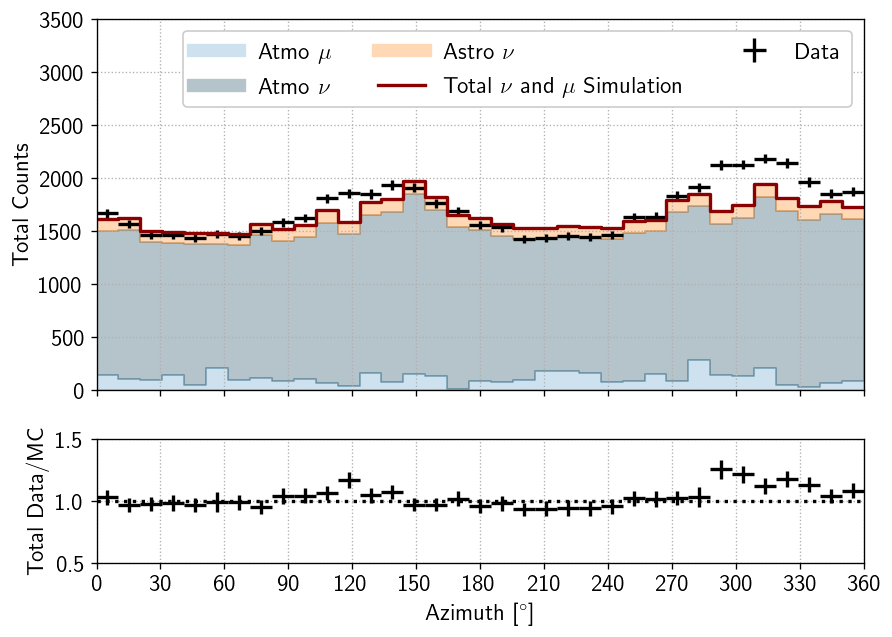

In [30]:
#lt = 3519.685 * 86400 
bins = 35
range=(0,360)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.degrees(exp.EventGeneratorSelectedRecoNN_I3Particle_azimuth).values, bins=bins,range=range)

hb_mc = hl.hist(np.degrees(mc.azi),
       weights = weight_dict['astro_bfr'] , log=False, bins=bins,  range=range)

hb_atmo_bfr= hl.hist(np.degrees(mc.azi).values, 
                     weights = weight_dict['conv_bfr'] + weight_dict['prompt_bfr'],
                     log=False, bins=bins, range=range)

hb_ss = hl.hist(np.degrees(snowstorm.azi).values, 
           weights =weight_dict['astro'], log=False,         
                bins = bins, range=range)

hb_corsika = hl.hist(np.degrees(mu_corsika.azi).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.azi).values, 
                weights=weight_dict['muongun'],
                bins = bins, range=range)

hb_atmo = hl.hist(np.degrees(snowstorm.azi).values, 
                     weights = weight_dict['conv'] + weight_dict['prompt'],
                     log=False, bins=bins, range=range)

#hb_t = hb_ss + hb_corsika + hb_muon + hb_atmo
hb_t = hb_mc + hb_corsika + hb_muon + hb_atmo_bfr



hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred') #colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')


hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo_bfr, hb_mc], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)
#ax2.fill_between(hb_t.centers[0],err_low, err_high, color=colors[1], alpha=0.4)
ax2.set_xlabel(r'Azimuth [$^\circ$]')
ax1.set_ylim(0,3500)
ax1.set_xticks(np.arange(0,360.1,30))
ax1.set_xlim(0,360)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=3)
ax2.grid()
if embargo_label:
    ax1.text(2, 2200, r'Under Embargo, Not For Proceedings', weight='bold', c='r')

hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'azimuth_datamc')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/Publications/GP/paperplots/fig_data_mc//coszen_datamc


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


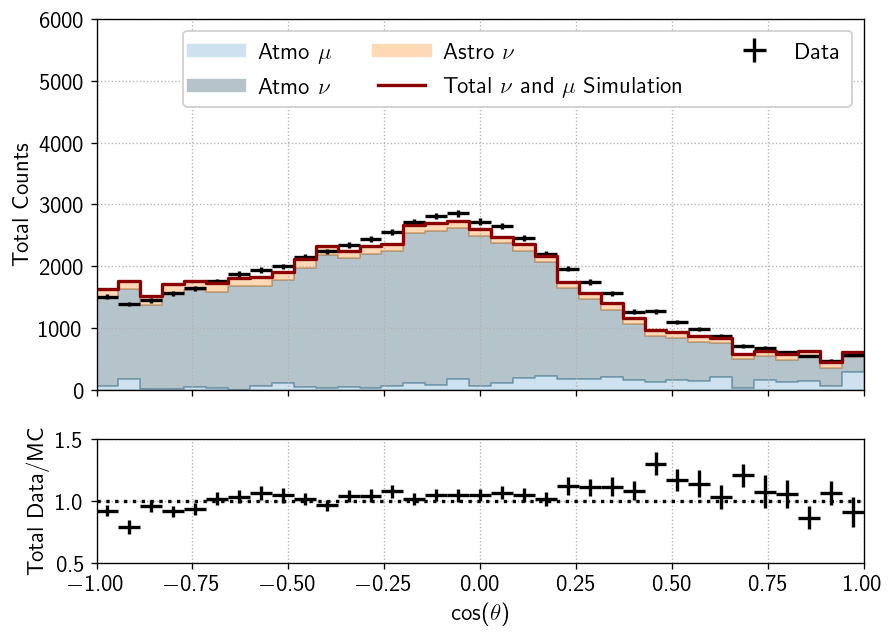

In [31]:
#lt = 3519.685 * 86400 
bins = 35
range = (-1,1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.cos(exp.zen).values, bins=bins, range=range)

hb_mc = hl.hist(np.cos(mc.zen),
     weights = weight_dict['astro_bfr'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.cos(snowstorm.zen).values, 
           weights = weight_dict['astro'], log=False,         
                bins = bins, range=range)

hb_corsika = hl.hist(np.cos(mu_corsika.zen).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=range)

hb_muon = hl.hist(np.cos(mu_muongun.zen).values, 
                weights=weight_dict['muongun'],
                bins = bins, range=range)

hb_atmo = hl.hist(np.cos(snowstorm.zen).values, 
                     weights = weight_dict['conv'] + weight_dict['prompt'],
                     log=False, bins=bins, range=range)

hb_atmo_bfr = hl.hist(np.cos(mc.zen).values, 
                     weights = weight_dict['conv_bfr'] + weight_dict['prompt_bfr'],
                     log=False, bins=bins, range=range)


hb_t = hb_mc+ hb_corsika + hb_muon + hb_atmo_bfr

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred')
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')

hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo_bfr, hb_mc], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)


ax2.set_xlabel(r'cos($\theta$)')
ax1.set_ylim(0,6000)
ax1.set_ylim(0)
ax1.set_xlim(0-1,1)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=3)
if embargo_label:
    ax1.text( -.95, 3100, r'Under Embargo, Not For Proceedings', weight='bold', c='r')

ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Total Counts')
cy.plotting.saving(plot_dir , 'coszen_datamc')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/Publications/GP/paperplots/fig_data_mc//sindec_datamc


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


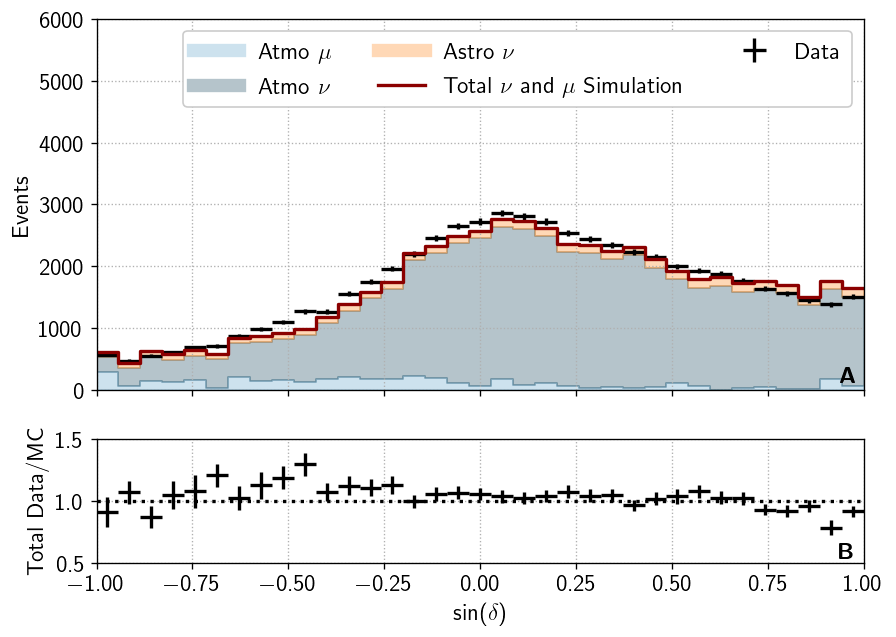

In [32]:
#lt = 3519.685 * 86400 
bins = 35
range = (-1,1)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.sin(exp.dec).values, bins=bins, range=range)

hb_mc = hl.hist(np.sin(mc.dec),
     weights = weight_dict['astro_bfr'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.sin(snowstorm.dec).values, 
           weights = weight_dict['astro'], log=False,         
                bins = bins, range=range)

hb_corsika = hl.hist(np.sin(mu_corsika.dec).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=range)

hb_muon = hl.hist(np.sin(mu_muongun.dec).values, 
                weights=weight_dict['muongun'],
                bins = bins, range=range)

hb_atmo = hl.hist(np.sin(snowstorm.dec).values, 
                     weights = weight_dict['conv'] + weight_dict['prompt'],
                     log=False, bins=bins, range=range)

hb_atmo_bfr = hl.hist(np.sin(mc.dec).values, 
                     weights = weight_dict['conv_bfr'] + weight_dict['prompt_bfr'],
                     log=False, bins=bins, range=range)


hb_t = hb_mc+ hb_corsika + hb_muon + hb_atmo_bfr

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred')
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')

hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo_bfr, hb_mc], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)


ax2.set_xlabel(r'sin($\delta$)')
ax1.set_ylim(0,6000)
ax1.set_ylim(0)
ax1.set_xlim(0-1,1)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=3)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
if embargo_label:
    ax1.text( -.95, 3100, r'Under Embargo, Not For Proceedings', weight='bold', c='r')
    
ax1.text(.98,50, r'\textbf{\textsf{A}}',horizontalalignment='right', verticalalignment='bottom', 
         fontfamily = 'serif',fontdict={'fontweight' : 'bold',
                                   'fontsize' : 14})

ax2.text( .98 , .5, r'\textbf{\textsf{B}}', horizontalalignment='right', verticalalignment='bottom',
            fontdict={'fontweight' : 'bold',
                                   'fontsize' : 14})
ax1.set_ylabel('Events')
cy.plotting.saving(plot_dir , 'sindec_datamc')

In [38]:
#save data for public_release
hb_data.bins[0].tofile('../Public_Release/FigS2/sindec_plot/data_bins.csv', sep = ',')
hb_data.values.tofile('../Public_Release/FigS2/sindec_plot/data_values.csv', sep = ',')
hb_data.errors.tofile('../Public_Release/FigS2/sindec_plot/data_errors.csv', sep = ',')

hb_muon = hb_corsika + hb_muon

hb_mc.bins[0].tofile('../Public_Release/FigS2/sindec_plot/astro_nu_bins.csv', sep = ',')
hb_mc.values.tofile('../Public_Release/FigS2/sindec_plot/astro_nu_values.csv', sep = ',')

hb_atmo_bfr.bins[0].tofile('../Public_Release/FigS2/sindec_plot/atmo_nu_bins.csv', sep = ',')
hb_atmo_bfr.values.tofile('../Public_Release/FigS2/sindec_plot/atmo_nu_values.csv', sep = ',')

hb_muon.bins[0].tofile('../Public_Release/FigS2/sindec_plot/mu_bins.csv', sep = ',')
hb_muon.values.tofile('../Public_Release/FigS2/sindec_plot/mu_values.csv', sep = ',')

hb_t.bins[0].tofile('../Public_Release/FigS2/sindec_plot/sim_tot_bins.csv', sep = ',')
hb_t.values.tofile('../Public_Release/FigS2/sindec_plot/sim_tot_values.csv', sep = ',')
hb_t.errors.tofile('../Public_Release/FigS2/sindec_plot/sim_tot_errors.csv', sep = ',')


In [40]:
for hist, label in zip ([hb_ss, hb_atmo, hb_muon, hb_corsika], ['Astro', 'Atmo', 'Muongun', 'Corsika']):
    print('{}: {:.4f}'.format(label, hist.sum()()))

Astro: 4133.4123
Atmo: 50981.2205
Muongun: 3840.3529
Corsika: 1380.6714


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/Publications/GP/paperplots/fig_data_mc//angerr_datamc


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


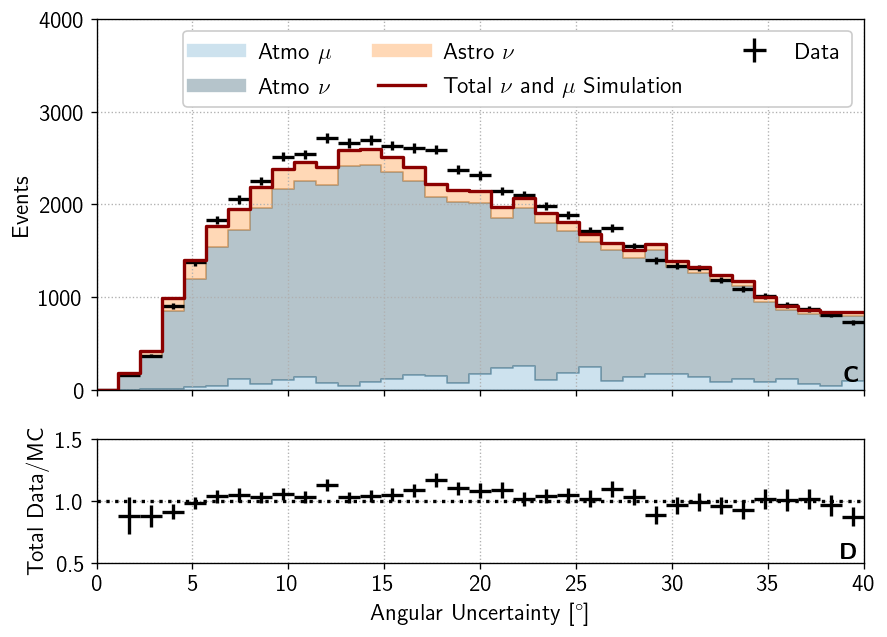

In [41]:
#lt = 3519.685 * 86400 
bins = 35
range = (0,40)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8.25,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist(np.degrees(exp.angErr).values, bins=bins, range=range)

hb_mc = hl.hist(np.degrees(mc.angErr),
       weights = weight_dict['astro_bfr'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.degrees(snowstorm.angErr).values, 
           weights =weight_dict['astro'], log=False,         
                bins = bins, range=range)

hb_corsika = hl.hist(np.degrees(mu_corsika.angErr).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=range)

hb_muon = hl.hist(np.degrees(mu_muongun.angErr).values, 
                weights= weight_dict['muongun'],
                bins = bins, range=range)

hb_atmo = hl.hist(np.degrees(snowstorm.angErr).values, 
                     weights = weight_dict['conv'] + weight_dict['prompt'],
                     log=False, bins=bins, range=range)

hb_atmo_bfr = hl.hist(np.degrees(mc.angErr).values, 
                     weights = weight_dict['conv_bfr'] + weight_dict['prompt_bfr'],
                     log=False, bins=bins, range=range)

hb_t = hb_mc+ hb_corsika + hb_muon + hb_atmo_bfr
hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo_bfr, hb_mc], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred' ) #(colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'Angular Uncertainty [$^\circ$]')
ax1.set_ylim(0,4000)
ax1.set_ylim(0)
ax1.set_xlim(0,40)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=3)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
if embargo_label:
    ax1.text(6, 800, r'Under Embargo, Not For Proceedings', weight='bold', c='r')
ax1.text(39.8,50, r'\textbf{\textsf{C}}',horizontalalignment='right', verticalalignment='bottom', 
         fontfamily = 'serif',fontdict={'fontweight' : 'bold',
                                   'fontsize' : 14})

ax2.text( 39.8 , .5, r'\textbf{\textsf{D}}', horizontalalignment='right', verticalalignment='bottom',
            fontdict={'fontweight' : 'bold',
                                   'fontsize' : 14})

ax1.set_ylabel('Events')
cy.plotting.saving(plot_dir , 'angerr_datamc')

In [42]:
#save data for public_release
hb_data.bins[0].tofile('../Public_Release/FigS2/angerr_plot/data_bins.csv', sep = ',')
hb_data.values.tofile('../Public_Release/FigS2/angerr_plot/data_values.csv', sep = ',')
hb_data.errors.tofile('../Public_Release/FigS2/angerr_plot/data_errors.csv', sep = ',')

hb_muon = hb_corsika + hb_muon

hb_mc.bins[0].tofile('../Public_Release/FigS2/angerr_plot/astro_nu_bins.csv', sep = ',')
hb_mc.values.tofile('../Public_Release/FigS2/angerr_plot/astro_nu_values.csv', sep = ',')

hb_atmo_bfr.bins[0].tofile('../Public_Release/FigS2/angerr_plot/atmo_nu_bins.csv', sep = ',')
hb_atmo_bfr.values.tofile('../Public_Release/FigS2/angerr_plot/atmo_nu_values.csv', sep = ',')

hb_muon.bins[0].tofile('../Public_Release/FigS2/angerr_plot/mu_bins.csv', sep = ',')
hb_muon.values.tofile('../Public_Release/FigS2/angerr_plot/mu_values.csv', sep = ',')

hb_t.bins[0].tofile('../Public_Release/FigS2/angerr_plot/sim_tot_bins.csv', sep = ',')
hb_t.values.tofile('../Public_Release/FigS2/angerr_plot/sim_tot_values.csv', sep = ',')
hb_t.errors.tofile('../Public_Release/FigS2/angerr_plot/sim_tot_errors.csv', sep = ',')


In [39]:
for hist, label in zip ([hb_ss, hb_atmo, hb_muon, hb_corsika], ['Astro', 'Atmo', 'Muongun', 'Corsika']):
    print('{}: {:.4f}'.format(label, hist.sum()()))

Astro: 4070.2484
Atmo: 50005.2783
Muongun: 3705.1136
Corsika: 1310.1056


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/Publications/GP/paperplots/fig_data_mc//energy_datamc


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


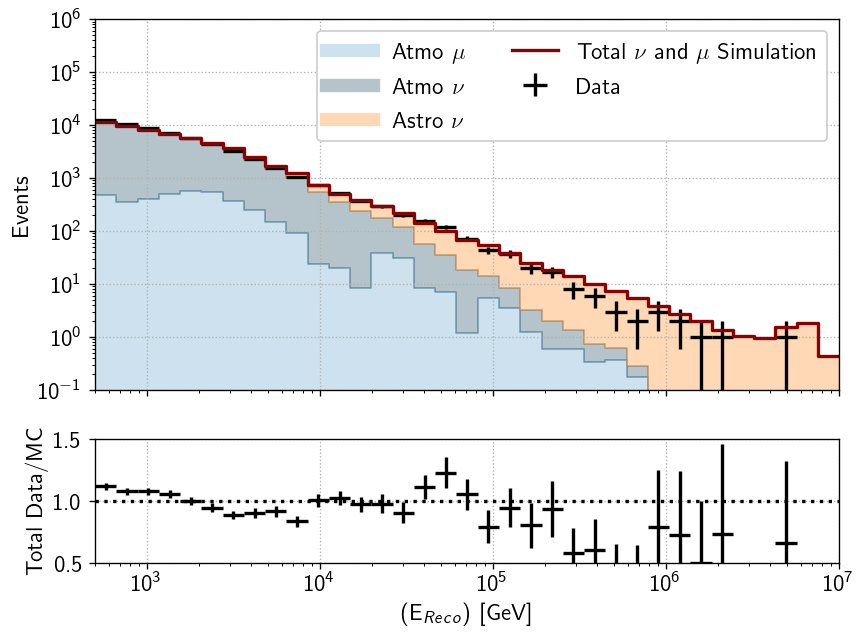

In [38]:
#lt = 3519.685 * 86400 
bins = 35
range = (500,1e7)
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6), gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
fig.set_facecolor('w')

hb_data = hl.hist((exp.energy).values, bins=bins, range=range, log=True)

hb_mc = hl.hist((mc.energy),
       weights = weight_dict['astro_bfr'], log=True, bins=bins,  range=range)

hb_ss = hl.hist((snowstorm.energy).values, 
           weights = weight_dict['astro'], log=True,         
                bins = bins, range=range)

hb_corsika = hl.hist((mu_corsika.energy).values, 
                weights=weight_dict['corsika'],
                bins = bins, range=range, log=True)

hb_muon = hl.hist((mu_muongun.energy).values, 
                weights= weight_dict['muongun'],
                bins = bins, range=range, log=True)

hb_atmo = hl.hist((mc.energy).values, 
                     weights = weight_dict['conv_bfr']  + weight_dict['prompt_bfr'] ,
                     log=True, bins=bins, range=range)

hb_t = hb_mc+ hb_corsika + hb_muon + hb_atmo


ax1.loglog()
ax2.semilogx()
hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo, hb_mc], colors=colors[::-1], 
           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred' ) #(colors[1])
hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')
ax2.set_xlabel(r'(E$_{Reco}$) [GeV]')
#ax1.set_ylim(0,4000)
ax1.set_ylim(1e-1,1e6)
ax1.set_xlim(500,1e7)
ax2.set_ylim(.5, 1.5)
ax2.set_ylabel('Total Data/MC')
ax2.set_yticks([0.5,1.0,1.5])
ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax2.grid()
hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Events')
cy.plotting.saving(plot_dir , 'energy_datamc')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


-> /home/ssclafani/public_html/Publications/GP/paperplots/fig_data_mc//Rate_expected_events_coszen


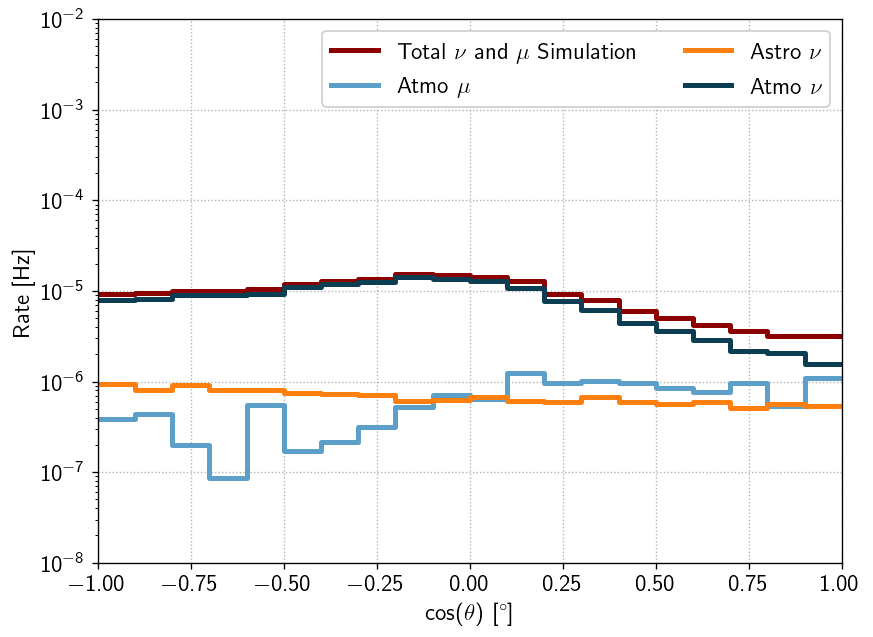

In [39]:
#lt = 3519.685 * 86400 
bins = 20
range = (-1,1)

fig, (ax1) = plt.subplots(1,1, figsize=(8,6))
fig.set_facecolor('w')

#hb_data = hl.hist(np.cos(exp.zen).values, bins=bins, range=range)

hb_mc = hl.hist(np.cos(mc.zen),
       weights = param_dict['astro'] * mc.ow* (mc.trueE/1e5)**-param_dict['gamma'], log=False, bins=bins,  range=range)

hb_ss = hl.hist(np.cos(snowstorm.zen).values, 
           weights = w_multiplier*param_dict['astro'] * snowstorm.ow* (snowstorm.trueE/1e5)**(-1.*param_dict['gamma']), log=False,         
                bins = bins, range=range)
hb_hans= hl.hist(np.cos(snowstorm.zen).values, 
           weights = w_multiplier*(snowstorm.weights_cscd_hans), bins=bins, range=range, log=False)

hb_corsika = hl.hist(np.cos(mu_corsika.zen).values, 
                weights=(param_dict['CORSIKA']*(mu_corsika.weights)/lt) , 
                bins = bins, range=range)

hb_muon = hl.hist(np.cos(mu_muongun.zen).values, 
                weights=(param_dict['MuonGun']*(mu_muongun.weights)/lt) , 
                bins = bins, range=range)

hb_atmo = hl.hist(np.cos(mc.zen).values, 
                     weights = (param_dict['conv']* mc.weights_MCEq_H3a_sibyll2_3c_conv*mc.nuveto_pf_dnn_cascade_selection_H3a_SIBYLL2_3c_conv +
                      param_dict['prompt'] *mc.weights_MCEq_H3a_sibyll2_3c_pr * mc.weights_MCEq_H3a_sibyll2_3c_pr ), 
                     log=False, bins=bins, range=range)

hb_t = hb_ss+ hb_corsika + hb_muon + hb_atmo

hl.plot1d(ax1, hb_t, errorbands=False, label=r'Total $\nu$ and $\mu$ Simulation', color='darkred', lw=3)
#hl.plot1d(ax1, hb_data, crosses=True, label='Data' , color='k')

#hl.stack1d(ax1, [hb_muon+hb_corsika, hb_atmo, hb_ss], colors=colors[::-1], 
#           labels=['Atmo $\mu$', r'Atmo $\nu$', r'Astro $\nu$'], alpha=0.3)
ax1.semilogy()
hl.plot1d(ax1, hb_muon+hb_corsika, label='Atmo $\mu$', alpha=1, color=colors[-1], lw=3)
hl.plot1d(ax1, hb_hans, label=r'Astro $\nu$', alpha=1, color=colors[-3], lw=3)
hl.plot1d(ax1, hb_atmo, label=r'Atmo $\nu$', alpha=1, color=colors[-2], lw=3)

ax1.set_xlabel(r'cos($\theta$) [$^\circ$]')
ax1.set_ylim(1e-8,1e-2)
#ax2.set_ylim(.5, 1.5)
#ax2.set_ylabel('Total Data/MC')
#ax2.set_yticks([0.5,1.0,1.5])
#ax2.axhline(1.0, ls=':', c='k' )
ax1.grid()
ax1.legend(ncol=2)
ax1.set_xlim(-1,1)
#ax2.grid()
if embargo_label:
    ax1.text( -.95, 1e-4, r'Under Embargo, Not For Proceedings', weight='bold', c='r', size=14)


#hl.plot1d(ax2, hb_data/hb_t, crosses=True, color='k') 
#ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Rate [Hz]')
cy.plotting.saving(plot_dir , 'Rate_expected_events_coszen', dpi=300)